In [2]:
# Import all the libraries we need.

%matplotlib inline
import re
import io
import urllib2
import numpy as np
import operator
import matplotlib.pyplot as plt
from matplotlib import pyplot
import nltk
from scipy.misc import imread
from wordcloud import WordCloud
import random
import glob
from palettable.colorbrewer.qualitative import Dark2_8
from collections import Counter
from nltk.corpus import PlaintextCorpusReader
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# Get all the episodes' names

We get all the episodes' names, and then print out them season by season. 

Store the episodes names in 'namelist'.

In [3]:
# Get all the episodes' names in season.txt
# It is like getting the total philosophers' names
f1 = io.open('season.txt', 'r', encoding='utf-8')
text = f1.read()
episodesname = re.findall(r'\[\[(.*?)[\|\]\]]', text)
f1.close()

In [4]:
# These are used for checking if we're getting the right number of episodes
count = 0
eps = 0
season = 0
namelist = []
for i in range(len(episodesname)):
    # We first ignore the "recap" part
    if episodesname[i][-5:] == "recap":
        count += 1
        continue
        
    # We look at the episodes season by season
    if episodesname[i][:6] == "Season":
        season += 1
        print "-----season %d-----" % season
        eps = 0
        count += 1
        continue
    eps += 1
    
    # Print out episodes name we want
    if season != 0:
        namelist.append(episodesname[i])
        print episodesname[i]

-----season 1-----
Winter is Coming (episode)
The Kingsroad
Lord Snow
Cripples, Bastards and Broken Things
The Wolf and the Lion
A Golden Crown
You Win or You Die
The Pointy End
Baelor
Fire and Blood
-----season 2-----
The North Remembers
The Night Lands
What is Dead May Never Die
Garden of Bones
The Ghost of Harrenhal
The Old Gods and the New
A Man Without Honor
The Prince of Winterfell
Blackwater
Valar Morghulis
-----season 3-----
Valar Dohaeris
Dark Wings, Dark Words
Walk of Punishment
And Now His Watch is Ended
Kissed by Fire
The Climb
The Bear and the Maiden Fair (episode)
Second Sons (episode)
The Rains of Castamere (episode)
Mhysa
-----season 4-----
Two Swords
The Lion and the Rose
Breaker of Chains
Oathkeeper
First of His Name
The Laws of Gods and Men
Mockingbird
The Mountain and the Viper
The Watchers on the Wall
The Children
-----season 5-----
The Wars to Come
The House of Black and White
High Sparrow (episode)
Sons of the Harpy (episode)
Kill the Boy
Unbowed, Unbent, Unbroke

# Word cloud

Generate the word cloud of each episode.

In [8]:
# Define color function for word cloud
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

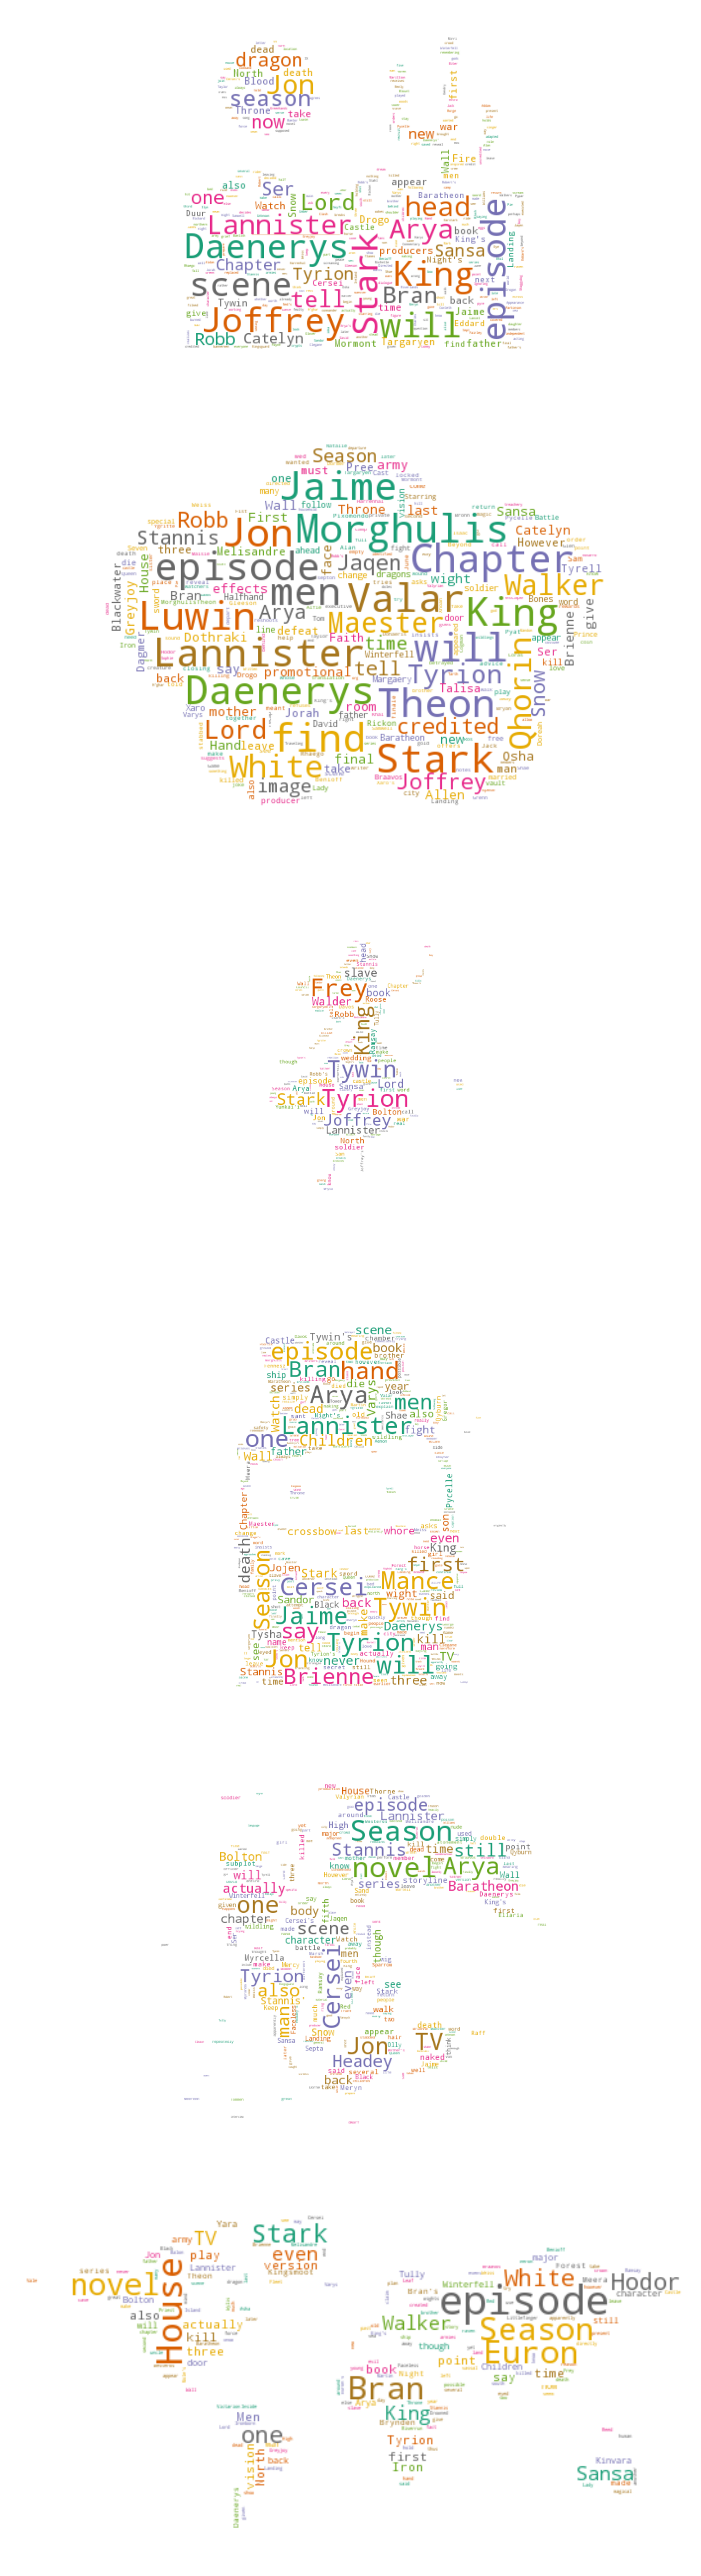

In [11]:
# Get all the dir paths of the masks
masks = glob.glob("masks/*.jpg")

plt.figure(figsize=(200,100))

number = 1
# Read the whole text.
for i in [9,19,29,39,49,54]:
    text = open("Episodes/%s.txt" % namelist[i]).read()

    mask1 = imread(masks[number-1])

    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # the matplotlib way:
    wordcloud = WordCloud(background_color="white", max_words=2000, max_font_size=40, mask=mask1).generate(text)
    # Recolor the plot to make it nicer
    wordcloud.recolor(color_func=color_func, random_state=5)

    plt.subplot(6,1,number)
    number += 1
    plt.imshow(wordcloud)
    plt.axis("off")
    
    wordcloud.to_file("wordcloud/%s.png" % namelist[i])
    
plt.show()

# Sentiment score together with character dispersion

* First, we define the sentiment function, and get the sentiment scores of the episodes.

* Second, we find the characters that appear more than 3 times in an episode, and get a list of their names.

* Then we plot the characternames' dispersion plot together with sentiment score plot episode by episode.

## 1. The sentiment score

First we get the total sentiment score of all the episodes, and plot them, in order to see the sentiment score's change over time.

In [5]:
# Load the LabMT file which is the file containing the sentiment words and their score
f = io.open('LabMT.txt', 'r' ,encoding='utf-8')
wlist=f.read().split()
wordlist=wlist[15:len(wlist)]

In [6]:
def sentiment(textfile):
    if not isinstance(textfile,list):
        #Load the textfile that should be analyzed
        text1 = io.open(textfile, 'r',encoding='utf-8')
        textlist=text1.read().split()
        text1.close()
    else:
        textlist=textfile
    #Remove all numbers.
    nonumbers=re.compile("[^\d]+").findall(' '.join(textlist))
    #Remove everything that is not words and return their lowercase.
    onlywords=re.compile("[\w|']+").findall(' '.join(nonumbers))
    finallist=[w.lower() for w in onlywords]

    #Make a list of all the words in the textfile and their count
    counts = Counter(finallist)
    most_common_list=counts.most_common()

    #Set the score to 0 and the word count to 0.
    score=0
    wordcount=0
    for i in range(len(most_common_list)):
        #Get a word in the textfile that is being scored.
        curword=most_common_list[i]
        #If the list in the text is part of the sentiment wordlist do the following.
        if curword[0] in wordlist:
            #Find the index of the word in the wordlist
            #and then add the score times the number of times the words appear to score
            wordindex=wordlist.index(curword[0])
            #The score is always 2 places further down in the list compared to the word.
            if wordlist[wordindex+2]!='--':
                score+=float(wordlist[wordindex+2])*curword[1]
                wordcount+=curword[1]
    if score==0:
        if not isinstance(textfile,list):
            print "None of the words in %s was in the LabMT wordlist." %textfile
        else:
            print "None of the words in the text file was in the LabMT wordlist."
    else:
        return score/wordcount

In [7]:
# Get the sentiment score episode by episode, print them out
# Store the scores in a list
print "Sentiment"
sescore = []
season = 0
for i in range(1,len(episodesname)):
    if episodesname[i][-5:] == "recap":
        continue
    if episodesname[i][:6] == "Season":
        season += 1
        print "-----season %d-----" % season
        continue
    if season != 0:
        print episodesname[i]
        score = sentiment('Episodes/%s.txt' % episodesname[i])
        sescore.append(score)
        print score

Sentiment
-----season 1-----
Winter is Coming (episode)
5.36387062566
The Kingsroad
5.3829896259
Lord Snow
5.34320470896
Cripples, Bastards and Broken Things
5.32643145788
The Wolf and the Lion
5.31
A Golden Crown
5.34156125959
You Win or You Die
5.33120500782
The Pointy End
5.27683107929
Baelor
5.33997057092
Fire and Blood
5.29353192398
-----season 2-----
The North Remembers
5.36022296173
The Night Lands
5.35935653582
What is Dead May Never Die
5.31907219115
Garden of Bones
5.29214106496
The Ghost of Harrenhal
5.31472831766
The Old Gods and the New
5.27347311828
A Man Without Honor
5.31209001783
The Prince of Winterfell
5.32603742433
Blackwater
5.25961286089
Valar Morghulis
5.34960580913
-----season 3-----
Valar Dohaeris
5.29274716583
Dark Wings, Dark Words
5.34702765512
Walk of Punishment
5.29877005348
And Now His Watch is Ended
5.25323997234
Kissed by Fire
5.2609232742
The Climb
5.37486578217
The Bear and the Maiden Fair (episode)
5.31682807399
Second Sons (episode)
5.37062654575
Th

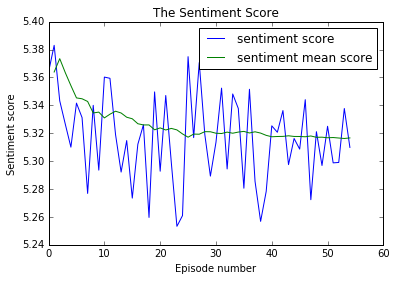

In [9]:
# Plot the sentiment scores (blue line)
# Together with the sentiment score mean (green line)
scoremean = []
for i in range(len(sescore)):
    scoremean.append(np.mean(sescore[:i]))
    
plt.plot(sescore,label="sentiment score")
plt.plot(scoremean,label="sentiment mean score")
plt.xlabel("Episode number")
plt.ylabel("Sentiment score")
plt.title("The Sentiment Score")
plt.legend()

## 2. The changing sentiment in each episode

We first define the function, and then create the desired plots using window lengths of 500.

In [10]:
def sentimentprofile(datalist,chunksize):
    # Divide the datalist into chunks
    chunks = [datalist[x:x+chunksize] for x in xrange(0, len(datalist), chunksize)]
    sentimentlist=[]
    # Calculate the sentiment for each chunk.
    for chunk in chunks:
        sentimentlist.append(sentiment(chunk))
    return sentimentlist

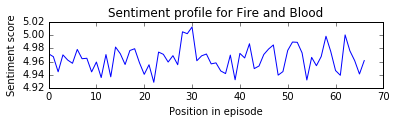

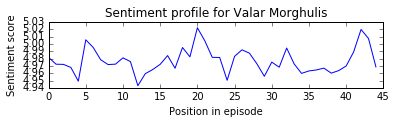

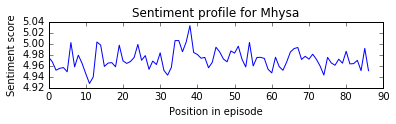

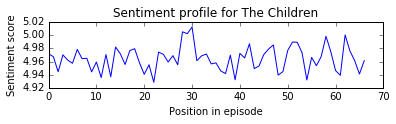

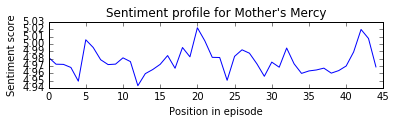

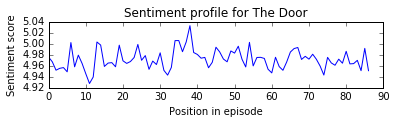

In [18]:
sentlist1_500 = []

num = 1
for i in [9,19,29]:
    text1 = open('Episodes/%s.txt' % namelist[i]).read()

    textlist1=[w for w in text1]
    
    plt.subplot(3,1,num)
    num += 1
    # Create the desired plots using window lengths of 500

    sentlist1_500.append(sentimentprofile(textlist1,500))
    plt.plot(sentlist1_500[num-2])
    plt.xlabel("Position in episode")
    plt.ylabel("Sentiment score")
    plt.title("Sentiment profile for %s" % namelist[i])
    plt.show()
    
num = 1
for i in [39,49,54]:
    text1 = open('Episodes/%s.txt' % namelist[i]).read()

    textlist1=[w for w in text1]
    
    plt.subplot(3,1,num)
    num += 1
    # Create the desired plots using window lengths of 500

    sentlist1_500.append(sentimentprofile(textlist1,500))
    plt.plot(sentlist1_500[num-2])
    plt.xlabel("Position in episode")
    plt.ylabel("Sentiment score")
    plt.title("Sentiment profile for %s" % namelist[i])
    plt.show()

## 3. Get the characters' names

We get the characters' names who appeared more than 3 times in an episode.

In [31]:
# Get the character names.
charnamesopen= open('char_names.txt', 'r')
charlist=charnamesopen.read().splitlines()
charnamesopen.close()
urlnamesopen= open('url_names.txt', 'r')
urllist=urlnamesopen.read().splitlines()
urlnamesopen.close()
season = 0
names = []

# Store the characters if they appear more than 3 times.
for i in range(len(episodesname)):
    if episodesname[i][-5:] == "recap":
        continue
    if episodesname[i][:6] == "Season":
        season += 1
        continue
    if season != 0:
        # Use the clean text for the sentiment score put the html text for finding characters.
        text1 = open("Episodes_api/%s.txt" % episodesname[i]).read()
        tmp = []
        for p in range(len(charlist)):
            url=urllist[p]
            regexname=r"\/" + re.escape(url) + r"\b"
            match=re.findall(regexname, text1)
            # If a character appears more than 3 times
            # Get his/her name and store it in a sublist
            if len(match)>=4:
                tmp.append(charlist[p])
        # Append the sublist to the total list
        names.append(tmp)

In [32]:
# We ignore their family names, 
# because sometimes in the episode text they were mentioned without family name
name = []
for j in range(len(names)):
    tmp = []
    for i in names[j]:
        tmp.append(i.split()[0])
    name.append(tmp)

## 4. Plot the sentiment profile together with character names' dispersion plot

* First, we create nltk Text of each episode.

* Then, based on previous sentiment profile work, we make the plot.

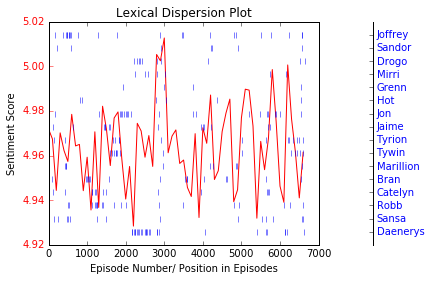

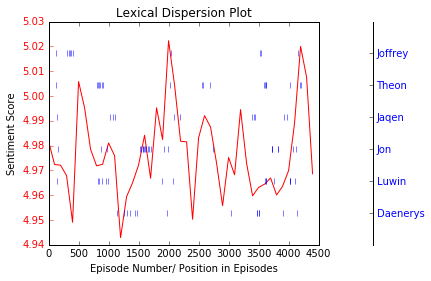

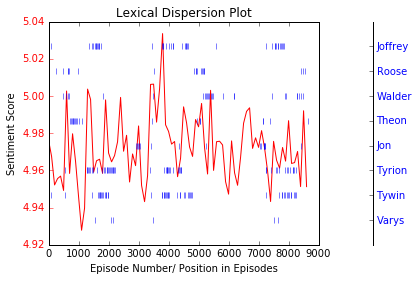

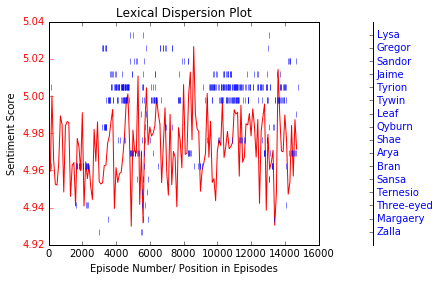

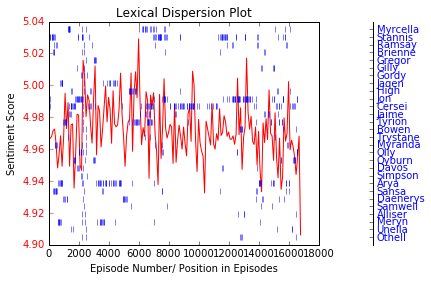

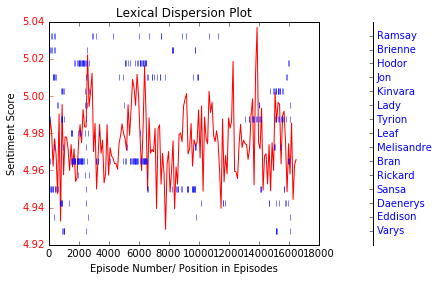

In [33]:
num = 0
for j in [9,19,29,39,49,54]:
# Create our nltk Text
    with io.open('Episodes/%s.txt' % namelist[j],encoding = "utf-8") as f:
        text1 = f.read()
    tokens = nltk.word_tokenize(text1)
    text = nltk.Text(tokens)

    fig, ax = plt.subplots()
    # Twin the x-axis twice to make independent y-axes.
    axes = [ax, ax.twinx()]

    # Make some space on the right side for the extra y-axis.
    fig.subplots_adjust(right=0.75)

    # Move the last y-axis spine over to the right by 20% of the width of the axes
    axes[-1].spines['right'].set_position(('axes', 1.2))

    # To make the border of the right-most axis visible, we need to turn the frame
    # on. This hides the other plots, however, so we need to turn its fill off.
    axes[-1].set_frame_on(True)
    axes[-1].patch.set_visible(False)

    # And finally we get to plot things
    # First we plot the sentiment score with using 500 window length with color 'Red'
    colors = ('Red', 'Blue')
    for ax, color in zip(axes, colors):
        ax.plot([i*100 for i in range(len(sentlist1_500[num]))],sentlist1_500[num], color=color)
        num += 1
        ax.set_ylabel('Sentiment Score')
        ax.tick_params(axis='y', colors=color)
        break
    axes[0].set_xlabel('Episode Number/ Position in Episodes')

    # Then we plot the NLTK dispersion plot on the same plot with color 'Blue'
    text.dispersion_plot(name[j])

    plt.show()

## 5. Positive & negative analysis

We get the positive/negative score of each episode, 

hoping to find if the changing tendency is related to the appearance frequency of some important characters.

In [34]:
# Get the sentiment analysis results using the built-in function in 
# nltk.sentiment.vader
season = 0
sid = SIA()

# Store the negative score in a list by sequence of the episodes
neg = []
# Store the neutral score in a list by sequence of the episodes
neu = []
# Store the positive score in a list by sequence of the episodes
pos = []
# Store the compound score in a list by sequence of the episodes
compound = []

# Calculate the scores in each episodes
for i in range(len(episodesname)):
    if episodesname[i][-5:] == "recap":
        continue
    if episodesname[i][:6] == "Season":
        season += 1
        print "season %d" % season
        continue
    if season != 0:
        text = open("Episodes/%s.txt" % episodesname[i]).read()
        ss = sid.polarity_scores(text)
        neg.append(ss['neg'])
        neu.append(ss['neu'])
        pos.append(ss['pos'])
        compound.append(ss['compound'])

season 1
season 2
season 3
season 4
season 5
season 6


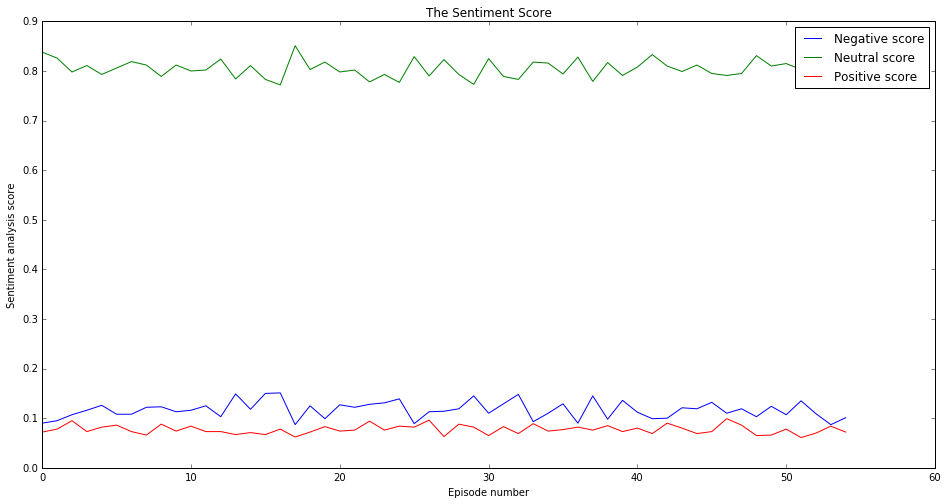

In [35]:
plt.figure(figsize=(16,8))
plt.plot(range(len(neg)),neg,label="Negative score")
plt.plot(range(len(neu)),neu,label="Neutral score")
plt.plot(range(len(pos)),pos,label="Positive score")
plt.xlabel("Episode number")
plt.ylabel("Sentiment analysis score")
plt.title("The Sentiment Score")
# Maybe we just leave compound score out
# Because we have too many words in a file, the compound score hardly makes any sense
plt.legend()

In [122]:
# See if the negative score is correlated with positive score.
np.corrcoef(neg,pos)

array([[ 1.        , -0.16398456],
       [-0.16398456,  1.        ]])

## 6. Characters & negative score

Then we're going to see if the negative score of each episode is related to the appearance frequency of some important characters.

In [36]:
# These are names of the characters who have top 10 in-degrees
names = ["Tyrion","Jon","Daenerys","Robb","Eddard","Jaime","Sansa","Stannis","Cersei","Tywin"]

In [37]:
# Find the appearance frequency of one role in all the episodes
totalcount = []
for j in range(len(names)):
    count = []
    for i in range(len(namelist)):
        with open("Episodes/%s.txt" % namelist[i]) as f:
            text = f.read()
            count.append(text.count(names[j]))
    totalcount.append(count)

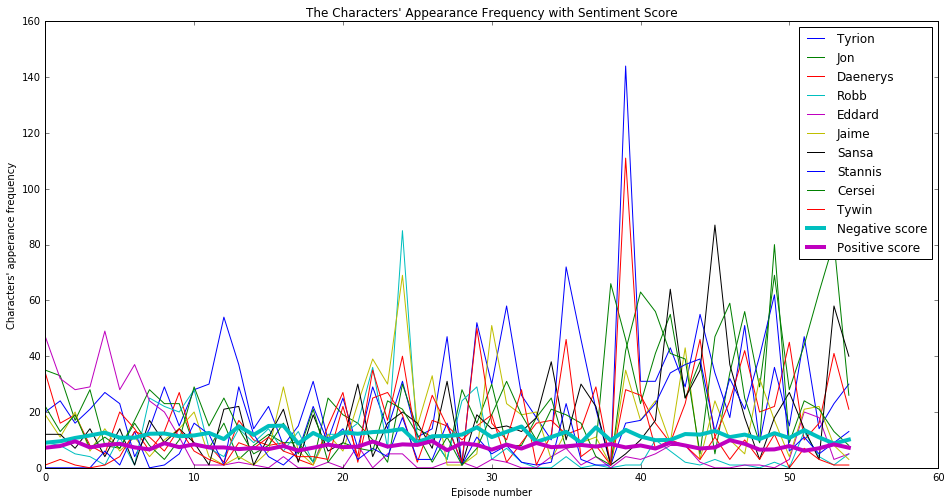

In [38]:
# Plot the role's appearance frequency together with the episodes' negative score
plt.figure(figsize=(16,8))
for i in range(10):
    plt.plot(range(len(totalcount[i])),totalcount[i],label=names[i])
plt.plot(range(len(neg)),[n*100 for n in neg],label="Negative score",linewidth=4)
plt.plot(range(len(pos)),[n*100 for n in pos],label="Positive score",linewidth=4)
plt.xlabel("Episode number")
plt.ylabel("Characters' apperance frequency")
plt.title("The Characters' Appearance Frequency with Sentiment Score")
plt.legend()